In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [4]:
churn_data=pd.read_csv('churn.csv')

In [5]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
#### CustomerId — идентификатор клиента
#### Surname — фамилия клиента
#### CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
#### Geography — страна клиента (банк международный)
#### Gender — пол клиента
#### Age — возраст клиента
#### Tenure — сколько лет клиент пользуется услугами банка
#### Balance — баланс на счетах клиента в банке
#### NumOfProducts — количество услуг банка, которые приобрёл клиент
#### HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
#### IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
#### EstimatedSalary — предполагаемая заработная плата клиента
#### Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

## Задача: 
## Нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов

In [7]:
categorical_col=churn_data.select_dtypes(include='object').columns
for col in categorical_col:
    print(col)

Surname
Geography
Gender


In [8]:
numerical_col=churn_data._get_numeric_data().columns
for col in numerical_col:
    print(col)

RowNumber
CustomerId
CreditScore
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Exited


## Задание 9.1 Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

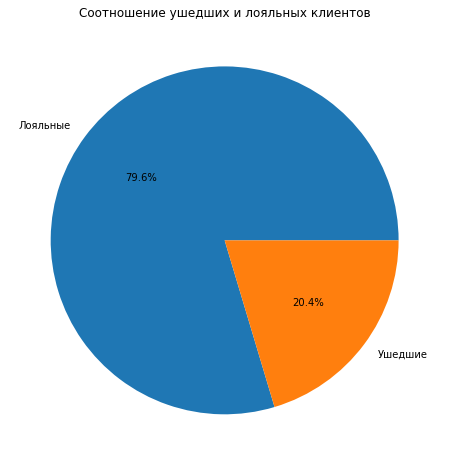

In [13]:
fig = plt.figure(figsize=(14, 8))
exited_сlients = churn_data['Exited'].value_counts()
plt.pie(exited_сlients, 
        labels=['Лояльные', 'Ушедшие'], 
        autopct='%.1f%%')
plt.title('Соотношение ушедших и лояльных клиентов')
plt.show()

Ушедшие клиенты составляют 20.4% \
Лояльные клиенты составляют 79.6% \
Доля лояльных клиентов почти в 4 раза превышает долю ушедших

## Задание 9.2 Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

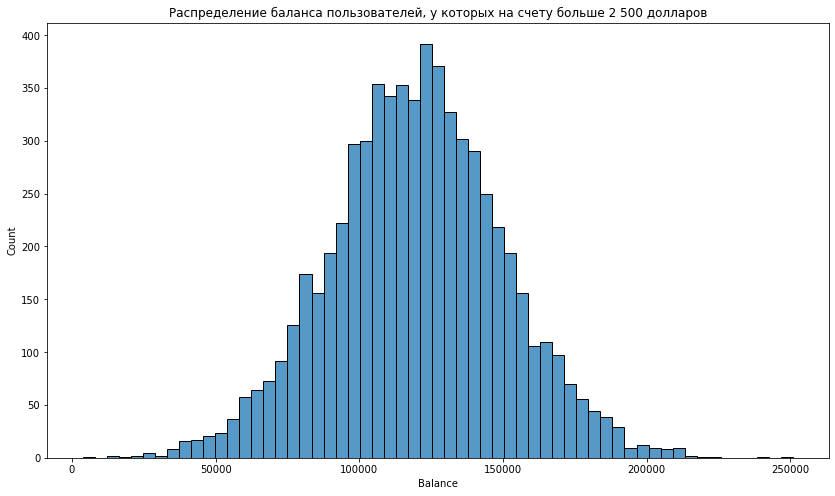

In [23]:
fig = plt.figure(figsize=(14, 8))
sns.histplot(data=churn_data.query('Balance > 2500'), 
             x='Balance', 
             kde=False)
plt.title('Распределение баланса пользователей, у которых на счету больше 2 500 долларов')
plt.show()

Представленное распределение близко к нормальному \
Имеется небольшое количество клиентов с существенно большим балансем, чем у остальных (т.н. выбросы)

## Задание 9.3 Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

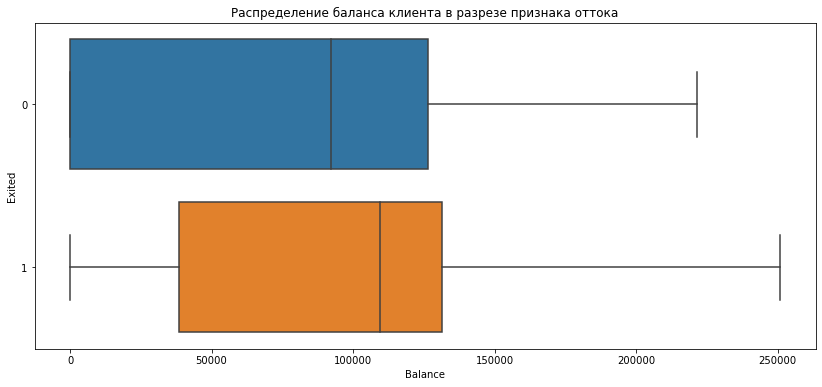

In [29]:
fig = plt.figure(figsize=(14, 6))
sns.boxplot(
    data=churn_data,
    x='Balance',
    y='Exited',
    orient='h',
)
plt.title('Распределение баланса клиента в разрезе признака оттока')
plt.show()

Из графика видно, что в среднем лояльные клиенты держат на счетах большие суммы, чем ушедшие

## Задание 9.4 Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

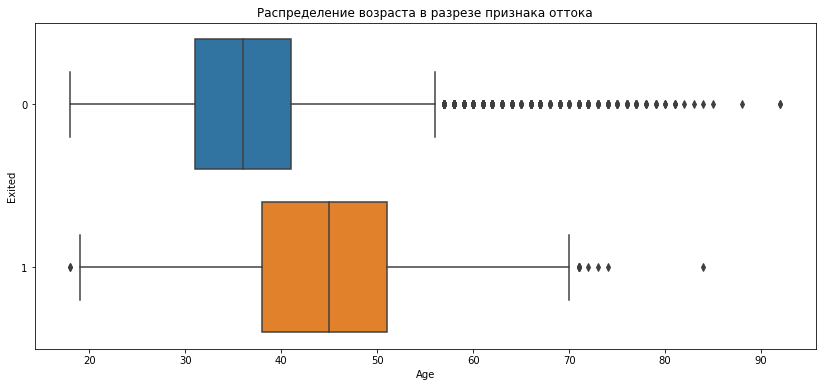

In [30]:
fig = plt.figure(figsize=(14, 6))
sns.boxplot(
    data=churn_data,
    x='Age',
    y='Exited',
    orient='h'
)
plt.title('Распределение возраста в разрезе признака оттока')
plt.show()

Потенциальных выбросов больше в группе лояльных клиентов \
Банку стоит обратить внимание на клиентов старше 55 лет

## Задание 9.5 Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

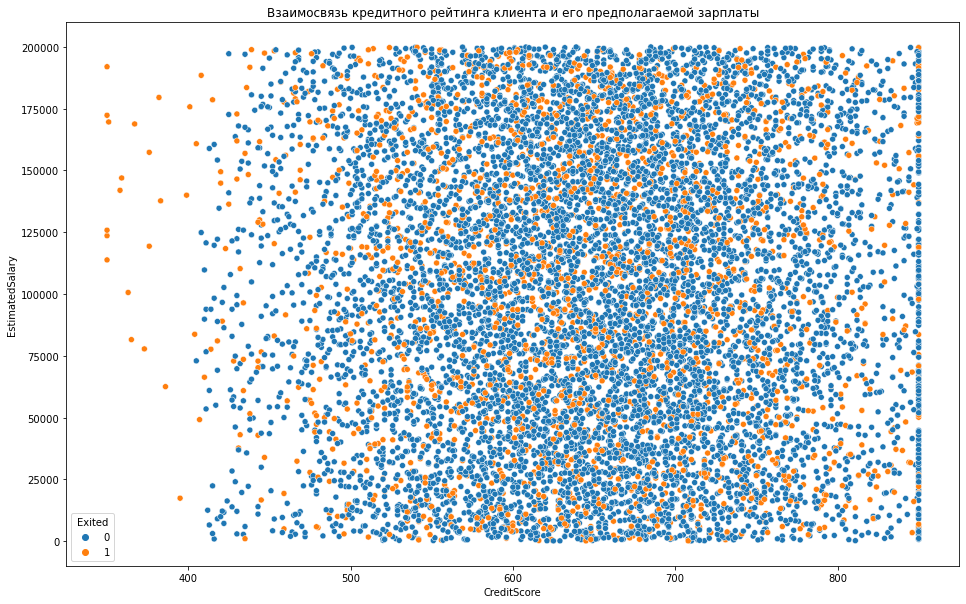

In [33]:
fig=plt.figure(figsize=(16,10))
sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited'
)
plt.title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
plt.show()

Явной взаимосвязи между признаками не наблюдается

## Задание 9.6 Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Text(0.5, 1.0, 'Иллюстрация лояльности в зависимости от пола')

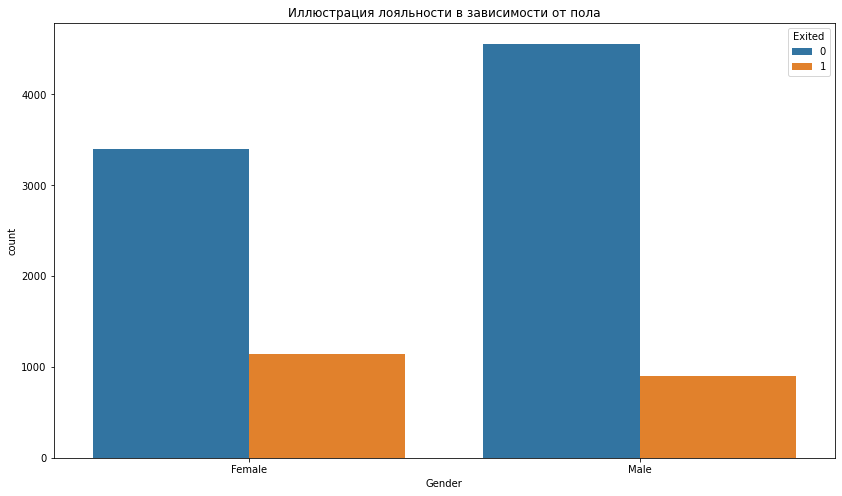

In [76]:
fig=plt.figure(figsize=(14, 8))
sns.countplot(x='Gender', 
              hue = 'Exited',
              data = churn_data)
plt.title('Иллюстрация лояльности в зависимости от пола')

По графику видно, что женщины уходят чаще

## Задание 9.7 Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

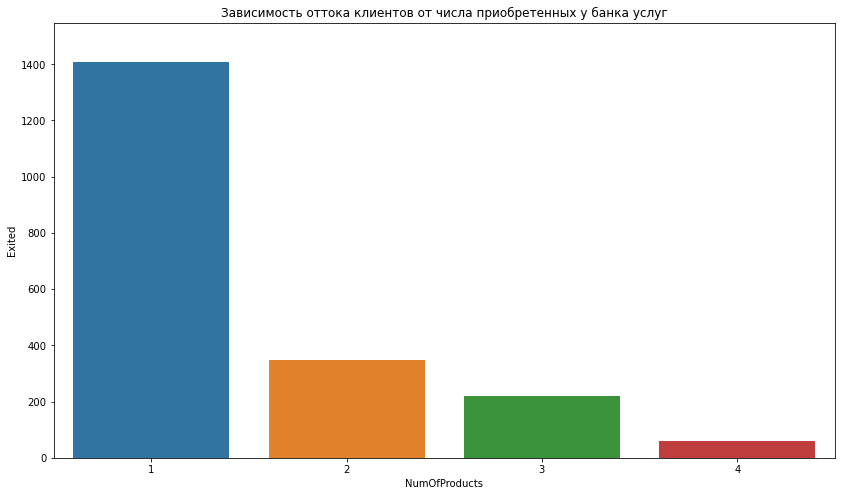

In [70]:
fig=plt.figure(figsize=(14, 8))
sns.barplot(data=churn_data, 
            x='NumOfProducts', 
            y='Exited',
            estimator=sum, 
            errwidth=0)
plt.title('Зависимость оттока клиентов от числа приобретенных у банка услуг')
plt.show()

По данному графику можно сделать вывол, что количество приобретенных услуг и отток клиентов имеют обратную зависимость

## Задание 9.8 Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

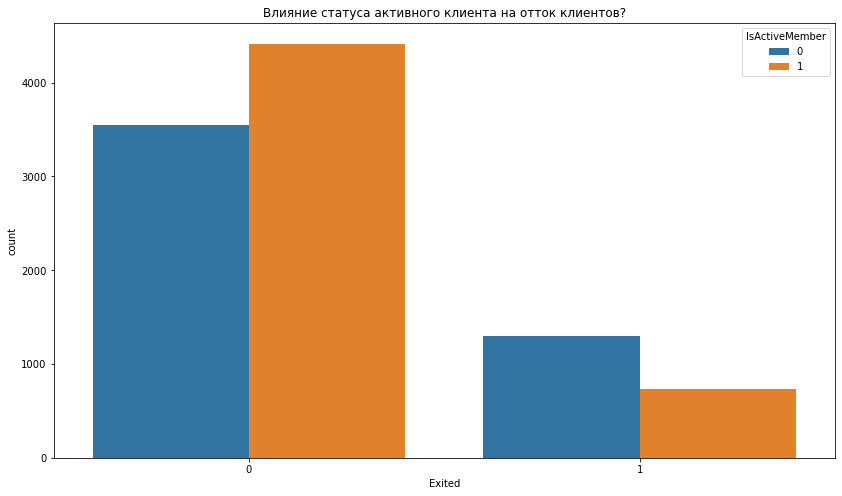

In [79]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Exited', 
              hue='IsActiveMember', 
              data=churn_data)
plt.title('Влияние статуса активного клиента на отток клиентов?')
plt.show()

Видим, что наличие статуса активного клиента положительно отражается на лояльности пользователей.

## Задание 9.9 В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [87]:
counties_data=churn_data.groupby(by='Geography', as_index=False)['Exited'].sum()
fig=px.choropleth(data_frame=counties_data, 
                  locations='Geography', 
                  locationmode='country names', 
                  color='Exited', 
                  title='Доля ушедших клиентов', 
                  width=900, 
                  height=500, 
                  color_continuous_scale='Reds')
fig.show()

Большая доля ушедших клиентов наблюдается в Германии и во Франции

## Задание 9.10 Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [88]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [89]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

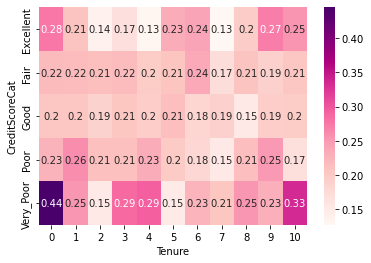

In [105]:
pivot_creditscore = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
)
sns.heatmap(data=pivot_creditscore, annot=True, cmap='RdPu')
plt.show()

Важно отметить, что чаще всего уходят клиенты категории Very_Poor